## Main Question
To analyze and optimize web traffic and user engagement!

### Data Understanding
The given dataset contains the following columns:

1. Session primary channel group: The marketing channel (e.g., Direct, Organic Social)
2. Date + hour (YYYYMMDDHH): The specific date and hour of the session
3. Users: Number of users in a given time period
4. Sessions: Number of sessions in that period
5. Engaged sessions: Number of sessions with significant user engagement
6. Average engagement time per session: The average time a user is engaged per session
7. Engaged sessions per user: Ratio of engaged sessions to total sessions per user
8. Events per session: Average number of events (actions taken) per session
9. Engagement rate: The proportion of sessions that were engaged
10. Event count: Total number of events during the period

The primary objective is to analyze and optimize web traffic and user engagement, focusing on:

1. **Session Analysis**: Understanding the temporal distribution and trends in web sessions and user visits to identify peak times and low-traffic periods.
2. **User Engagement Analysis**: Evaluating how engaged users are during their sessions across different channels, aiming to enhance user interaction and satisfaction.
3. **Channel Performance**: Assessing the effectiveness of various traffic channels in attracting and retaining users, to optimize marketing spend and strategy.
4. **Website Traffic Forecasting**: Predicting future traffic trends to better allocate resources and tailor content delivery according to predicted user demand.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("Datasets/data-export.csv")

In [5]:
dataset.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Session primary channel group (Default channel group)  3182 non-null   object 
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   int64  
 2   Users                                                  3182 non-null   int64  
 3   Sessions                                               3182 non-null   int64  
 4   Engaged sessions                                       3182 non-null   int64  
 5   Average engagement time per session                    3182 non-null   float64
 6   Engaged sessions per user                              3182 non-null   float64
 7   Events per session                                     3182 non-null   float64
 8   Engagement rate                                 

In [8]:
dataset.describe()

,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3.182000e+03,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2.024043e+09,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470
std,2.695099e+03,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313
min,2.024041e+09,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.024041e+09,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000
50%,2.024042e+09,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000
75%,2.024043e+09,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000
max,2.024050e+09,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000


#### Data Prepration
Preparing and summarizing the dataset for Time Series Analysis, focusing on how user engagement (through sessions) varies by time.  
By converting data into appropriate types and grouping it by time, we can easily perform operations like plotting TimeSeries graphs, calculating moving averages, or applying TimeSeries forecasting models.

In [9]:
# Converting the date column into an appropriate datetime format!
dataset['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(dataset['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')

In [13]:
dataset['Users'] = pd.to_numeric(dataset['Users'])
dataset['Sessions'] = pd.to_numeric(dataset['Sessions'])

In [14]:
# Group data by date and sum up the users and sessions
groupped_data = dataset.groupby(dataset['Date + hour (YYYYMMDDHH)']).agg({'Users':'sum', 'Sessions':'sum'})

**Anlyzing the Total Users and Sessions Over Time.**

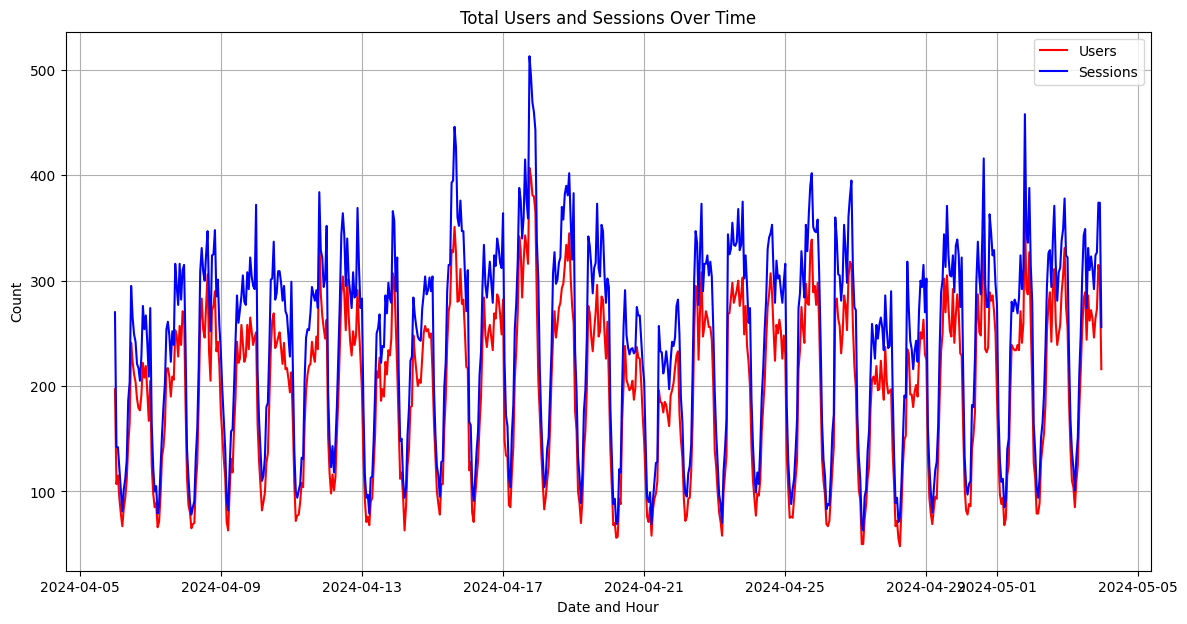

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(groupped_data.index, groupped_data['Users'], label="Users", color="red")
plt.plot(groupped_data.index, groupped_data['Sessions'], label="Sessions", color="blue")
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

From the graph, we can observe there are some fluctuations in the number of users and sessions, possibly indicating daily cycles or specific high-traffic periods.  
Both users and sessions appear to follow a similar trend, which is expected as more users generally mean more sessions. Some peaks might correspond to specific marketing activities, promotions, or events.

**Analyzing The User Engagement**

In [24]:
# Converting Relevant Columns To Numeric For Enagement Analysis
dataset['Engaged sessions'] = pd.to_numeric(dataset['Engaged sessions'])
dataset['Average engagement time per session'] = pd.to_numeric(dataset['Average engagement time per session'])
dataset['Engaged sessions per user'] = pd.to_numeric(dataset['Engaged sessions per user'])
dataset['Events per session'] = pd.to_numeric(dataset['Events per session'])
dataset['Engagement rate'] = pd.to_numeric(dataset['Engagement rate'])

In [26]:
# Grouping by date and calculate mean for engagement metrics.
engagement_metrics = dataset.groupby(dataset['Date + hour (YYYYMMDDHH)']).agg({'Average engagement time per session': 'mean',
                                                                               'Engaged sessions per user': 'mean',
                                                                               'Events per session': 'mean',
                                                                               'Engagement rate': 'mean'})

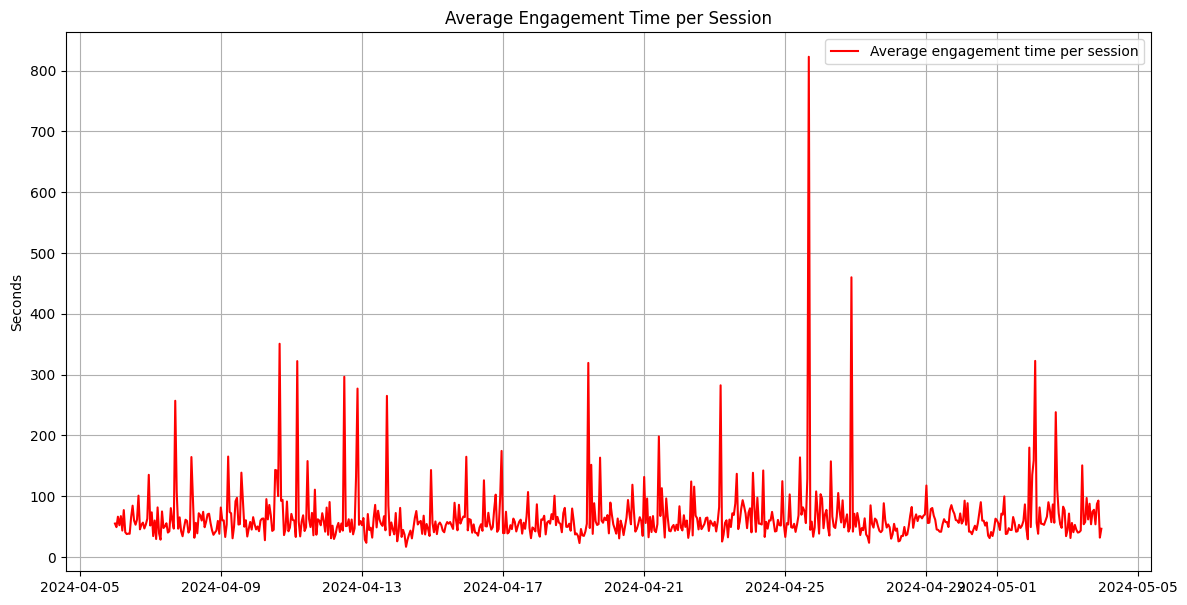

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label="Average engagement time per session", color="red")
plt.title('Average Engagement Time per Session')
plt.ylabel('Seconds')
plt.legend()
plt.grid(True)
plt.show()

**Average Engagement Time per Session**: The time spent per session shows fluctuations over the observed period.  
There are noticeable peaks, suggesting times when users were particularly engaged, potentially due to specific content releases or events.